In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('./Resources/meyers_data.csv')
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
train_data,test_data=train_test_split(data,test_size=0.2,random_state=42,stratify=data.type)

In [4]:
def clear_text(data):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    for sentence in tqdm(data.posts):
        sentence=sentence.lower()
        
#         removing links from text data
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
    
#         removing other symbols
        sentence=re.sub('[^0-9a-z]',' ',sentence)
    
        
        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
    return cleaned_text,data_length

In [5]:
train_data.posts,train_length=clear_text(train_data)

100%|█████████████████████████████████████████████████████████████████████████████| 6940/6940 [00:07<00:00, 969.71it/s]


In [6]:
test_data.posts,test_length=clear_text(test_data)

100%|████████████████████████████████████████████████████████████████████████████| 1735/1735 [00:01<00:00, 1024.92it/s]


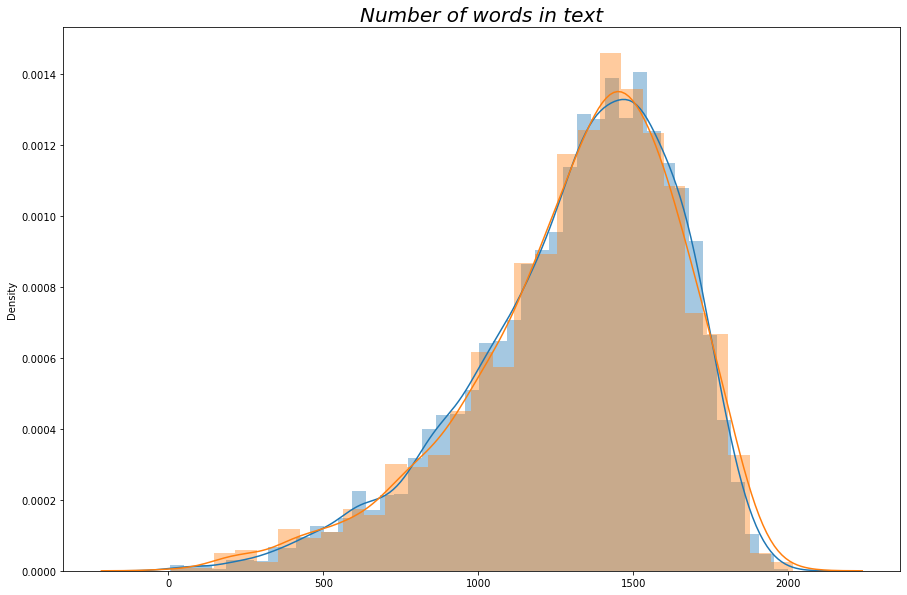

In [7]:
plt.figure(figsize=(15,10))
sns.distplot(train_length,label='train data word length')
sns.distplot(test_length,label='test data word length')
plt.title('Number of words in text',fontdict={'size':20,'style':'italic'})
plt.show()

In [9]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [10]:
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.posts)

TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x00000193167D7A60>)

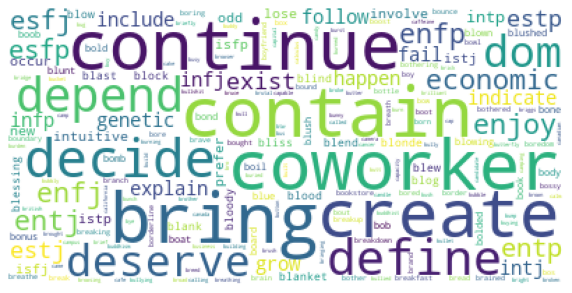

In [29]:
feature_names=vectorizer.get_feature_names()
wc=WordCloud(max_words=5000, background_color='white', max_font_size = 50)
wc.generate(' '.join(word for word in feature_names[500:3500] ))
plt.figure(figsize=(10,10))
plt.axis('off')

plt.savefig("word_scramble2.png")

plt.imshow(wc)

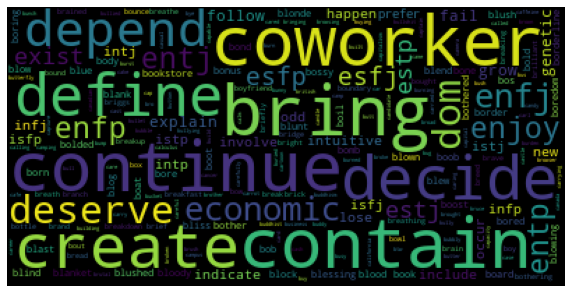

In [28]:
feature_names=vectorizer.get_feature_names()
wc=WordCloud(max_words=2000, background_color='black', max_font_size = 50)
wc.generate(' '.join(word for word in feature_names[500:3500] ))
plt.figure(figsize=(10,10))
plt.axis('off')

plt.savefig("word_scramble1.png")

plt.imshow(wc)


In [19]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS


def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open(path.join(d, "stormtrooper.png")))


# pre-processing the text a little bit
text = text.replace("HAN", "Han")
text = text.replace("LUKE'S", "Luke")

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("a_new_hope.png")
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

NameError: name 'text' is not defined